<a href="https://colab.research.google.com/github/hunnurjirao/Machine-Learning-With-TensorFlow/blob/master/Projects/Graduate_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graduate Admission**

The goal of the Project is all about the Prediction of Graduate Admissions. This dataset was takn from the Kaggle here https://www.kaggle.com/tags/linear-regression . The dataset contains several parameters which are considered important during the application for Masters Programs.

**The parameters included are :** 

1.GRE Scores ( out of 340 )

2.TOEFL Scores ( out of 120 )

3.University Rating ( out of 5 )

4.Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

5.Undergraduate GPA ( out of 10 )

6.Research Experience ( either 0 or 1 )

7.Chance of Admit ( ranging from 0 to 1 )

As discussed in this tutorial http://deeplearningprojectshub.co/index.html/ML03.html, we are using TensorFlow to solve this Linear Regression Problem.

### Importing Necessary modules
We will start asusual by importing our necessary modules

In [1]:
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
sess = tf.Session()

Instructions for updating:
non-resource variables are not supported in the long term


### Prepare the data

Load the datasets, that contains columns [Serial No.,	GRE Score,	TOEFL Score,	University Rating,	SOP,	LOR,	CGPA,	Research,	Chance of Admit
 ]


Here every feature is important fot this problem except the Serial No. which dosen't affect the Chance of Admit of the Student. So we will exclude that from our dataset.

In [2]:
df = pd.read_csv("Graduate_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Data Preprocessing
Data Preprocessing is very much important while going to train our model. Here we have conformed that there are no null values in our dataframe. So we are good to go to train our model. If there are any null values, make sure that you fill that null values with mean or median of that specific data column. 

In [3]:
df.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [4]:
X = df.iloc[:,1:8]

y = df["Chance of Admit "]

In [5]:
X = np.asarray(X)
y = np.asarray(y)

In [6]:
X.shape

(400, 7)

In [7]:
y = y.reshape(400,1)
y.shape

(400, 1)

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(X,y,test_size = 0.33)

Now we will use the TensorFlow operations that we have learned in here  http://deeplearningprojectshub.co/index.html/ML03.html. Here we have created placeholders and variables for further use. We have also done linear operation i.e. Y = m * X + c. Note that here X is the matrix of features  and Y is the matrix of target. Our goal is to find the matrix m that contains the slope values and also to find the y-intercept c.

In [9]:
x_data = tf.placeholder(shape = [None,7], dtype = tf.float32)
y_target = tf.placeholder(shape = [None,1], dtype = tf.float32)

A = tf.Variable(tf.random_normal([7,1]))
b = tf.Variable(tf.random_normal([1,1]))

In [10]:
model_output = tf.add(tf.matmul(x_data,A),b)

In [11]:
# elastic_param1 = tf.constant(1.)
# elastic_param2 = tf.constant(1.)
# l1_a_loss = tf.reduce_mean(tf.abs(A))
# l2_a_loss = tf.reduce_mean(tf.square(A))
# e1_term = tf.multiply(elastic_param1, l1_a_loss)
# e2_term = tf.multiply(elastic_param2, l2_a_loss)
# loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), e1_term), e2_term), 0)


### Loss and Optimizers

Here we used L1 loss which is absolute difference between the predicted and actual values and similarly we used Gradient Descent Optiizer with learning rate 0.00001

In [29]:
loss = tf.reduce_mean(tf.abs(model_output - y_target))

my_optim = tf.train.GradientDescentOptimizer(learning_rate = 0.00001)
optimizer = my_optim.minimize(loss)

In [30]:
init = tf.global_variables_initializer()
sess.run(init)

### Training loop

Now we will start our training loop. loss_vals stores the loss value at each iteration and here we used batch_size = 64.


Instead of training all the examples at a time, here we are training 64 examples at a time.

In [31]:
loss_vals = []
batch_size = 64
for i in range(500):
  rand_index = np.random.choice(len(x_train), size=batch_size)

  rand_X = x_train[rand_index]
  rand_y = (y_train[rand_index])
  rand_y = rand_y.reshape(batch_size,1)
  sess.run(optimizer, feed_dict = {x_data: rand_X, y_target: rand_y})
  temp_loss = sess.run(loss, feed_dict = {x_data: rand_X, y_target: rand_y})

  loss_vals.append(temp_loss)
  if (i+1)%50==0:
    print('Step: ' + str(i+1) + '  loss: ' + str(temp_loss) )

print(' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)) + '  Loss: ' + str(temp_loss))

Step: 50  loss: 395.74857
Step: 100  loss: 338.2331
Step: 150  loss: 284.2125
Step: 200  loss: 227.84654
Step: 250  loss: 171.99542
Step: 300  loss: 115.91063
Step: 350  loss: 60.667587
Step: 400  loss: 4.7648053
Step: 450  loss: 1.1509173
Step: 500  loss: 1.1963086
 A = [[-0.01952957]
 [ 0.09871853]
 [-0.2572442 ]
 [-0.37538677]
 [-1.3363227 ]
 [ 0.1879764 ]
 [ 1.1095754 ]] b = [[0.80133146]]  Loss: 1.1963086


OOh! we got loss = 1.1 approx. Not Bad!

Whatever, now let us plot the loss graph w.r.t number of iterations

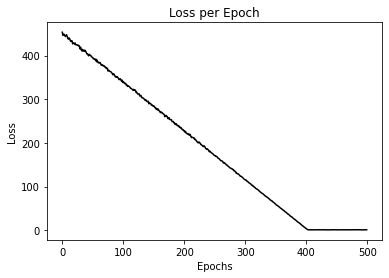

In [32]:
import matplotlib.pyplot as plt

plt.plot(loss_vals, 'k-')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Predictions

Here, we used sigmoid function, because out output varies from 0 to 1.

Finally the model predicted as 91 members are admitted for Graduation where really 122 members are admitted for Graduation. Similarly model predicted as 41 members are not admitted for Graduation where really 10 members are not admitted for Graduation

In [33]:
a = sess.run(tf.nn.sigmoid(model_output),feed_dict={x_data: x_test})

ypred_pos=0
ypred_neg=0

for i in range(len(a)):
  if a[i] > 0.5:
    ypred_pos = ypred_pos + 1
  else:
    ypred_neg = ypred_neg + 1


In [34]:
print("Model predicted as admitted for Graduation: " + str(ypred_pos))
print("Model predicted as not admitted for Graduation: " + str(ypred_neg))

Model predicted as admitted for Graduation: 91
Model predicted as not admitted for Graduation: 41


In [35]:
ytest_pos=0
ytest_neg=0

for i in range(len(y_test)):
  if y_test[i] > 0.5:
    ytest_pos = ytest_pos + 1
  else:
    ytest_neg = ytest_neg + 1


In [36]:
print("Actually admitted for Graduation: " + str(ytest_pos))
print("Actually not admitted for Graduation: " + str(ytest_neg))

Actually admitted for Graduation: 122
Actually not admitted for Graduation: 10
